In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
import csv
dat = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dat.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/25/22,4/26/22,4/27/22,4/28/22,4/29/22,4/30/22,5/1/22,5/2/22,5/3/22,5/4/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,178745,178769,178809,178850,178873,178879,178899,178901,178901,178901
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,274828,274862,274929,275002,275055,275107,275167,275177,275191,275211
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265771,265772,265773,265776,265779,265780,265782,265782,265782,265782
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,41013,41013,41013,41349,41349,41349,41349,41349,41349,41717
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


In [2]:
## Get Italy, drop everyrthing except dates, convert to long (unstack converts to tuple)
y=dat[dat['Country/Region'] == 'Italy'].drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1).unstack()
## convert from tuple to array
y = np.asarray(y)  
## get case counts instead of cumulative counts
y = y[1 : y.size] - y[0 : (y.size - 1)]
## get the first non zero entry
y =  y[np.min(np.where(y !=  0)) : y.size]

In [3]:
y1= y[np.min(np.where(y !=  0))+5 : y.size]
x1=y[np.min(np.where(y !=  0))+4 : y.size-1]
x2=y[np.min(np.where(y !=  0))+3 : y.size-2]
x3=y[np.min(np.where(y !=  0))+2 : y.size-3]
x4=y[np.min(np.where(y !=  0))+1 : y.size-4]
x5=y[np.min(np.where(y !=  0)) : y.size-5]

data = {"Y": y1, "X1": x1, "X2": x2, "X3": x3,"X4": x4,"X5": x5}

In [4]:
df = pd.DataFrame(data)
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf






In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl

In [6]:
G = nx.DiGraph()
G.add_node("X1",     pos = (0, 2) )
G.add_node("X2",     pos = (1, 2) )
G.add_node("X3",     pos = (2, 2) )
G.add_node("X4",     pos = (3, 2) )
G.add_node("X5",     pos = (4, 2) )

G.add_node("H1",  pos = (1.0, 1) )
G.add_node("H2",  pos = (3.0, 1) )


G.add_node("Y" ,  pos = (2, 0) )

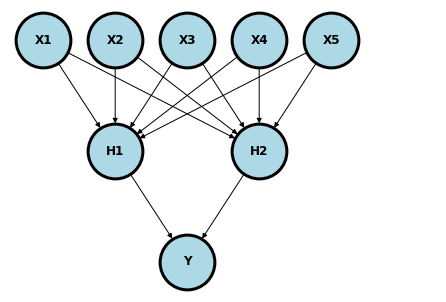

In [7]:
G.add_edges_from([ ("X1", "H1"), ("X2", "H1"), ("X3", "H1"),  ("X4", "H1"), ("X5", "H1")])
G.add_edges_from([ ("X1", "H2"), ("X2", "H2"), ("X3", "H2"),  ("X4", "H2"), ("X5", "H2")])


G.add_edges_from([ ("H1",  "Y"), ("H2",  "Y")])
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 3000,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-.5, 5.5])
ax.set_ylim([-.3, 2.3])
plt.show()

In [8]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
sns.set()
X = df.values
train_size = int(len(X) * 0.5)
train, test = X[0:train_size], X[:]

print(X[0])

[0 0 0 0 0 2]


In [9]:
train_X1, train_X2,train_X3,train_X4,train_X5,train_Y = train[:,0], train[:,1], train[:,2], train[:,3], train[:,4], train[:,5]
test_X1, test_X2,test_X3,test_X4,test_X5,test_Y = test[:,0], test[:,1], test[:,2], test[:,3], test[:,4], test[:,5]

In [10]:
data_train = {"Ytr": train_Y, "X1tr": train_X1, "X2tr": train_X2, "X3tr": train_X3,"X4tr": train_X4,"X5tr": train_X5}

df_train = pd.DataFrame(data_train)

data_test = {"Yte": test_Y, "X1te": test_X1, "X2te": test_X2, "X3te": test_X3,"X4te": test_X4,"X5te": test_X5}

df_test = pd.DataFrame(data_test)
df_train.columns.values.tolist()

['Ytr', 'X1tr', 'X2tr', 'X3tr', 'X4tr', 'X5tr']

In [11]:
xtr = torch.from_numpy(df_train[['X1tr','X2tr', 'X3tr', 'X4tr', 'X5tr', ]].values)

In [12]:
ytr = torch.from_numpy(df_train[['Ytr']].values)

In [13]:
xte=torch.from_numpy(df_test[['X1te','X2te', 'X3te', 'X4te', 'X5te', ]].values)

In [14]:
yte=torch.from_numpy(df_test[['Yte' ]].values)

In [15]:
xtr = xtr.float()
ytr = ytr.float()
xte = xte.float()
yte = yte.float()

In [16]:
xtraining = xtr
xtesting = xte
ytraining = ytr 
ytesting = yte

[
 xtraining.size(),
 ytraining.size(),
 xtesting.size(),
 ytesting.size(),
]

[torch.Size([410, 5]),
 torch.Size([410, 1]),
 torch.Size([820, 5]),
 torch.Size([820, 1])]

In [17]:
## Define the model
## Dimension of the hidden layer
H = 2

## Number of predictors
D_in = xtraining.size()[1]
D_out = 1

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

In [18]:
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(100000):
    y_pred = model(xtraining)
    loss = loss_fn(y_pred, ytraining)
    if t % 10000 == 0:
        print(t, loss.item())
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 140665765888.0
10000 39088312320.0
20000 39088312320.0
30000 39088312320.0
40000 39088312320.0
50000 39088312320.0
60000 39088312320.0
70000 39088312320.0
80000 39088312320.0
90000 39088312320.0


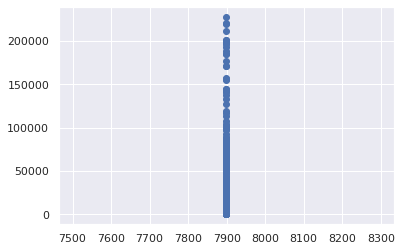

In [19]:
## try prediction
ytesting_pred = model(xtesting)
a = ytesting_pred.detach().numpy()

plt.scatter(a[:,0], ytesting[:,0])

In [20]:
G = nx.DiGraph()
G.add_node("X1",     pos = (0, 3) )
G.add_node("X2",     pos = (1, 3) )
G.add_node("X3",     pos = (2, 3) )
G.add_node("X4",     pos = (3, 3) )
G.add_node("X5",     pos = (4, 3) )

G.add_node("H1",  pos = (1.0, 2) )
G.add_node("H2",  pos = (3.0, 2) )

G.add_node("H3",  pos = (1.0, 1) )
G.add_node("H4",  pos = (3.0, 1) )

G.add_node("Y" ,  pos = (2, 0) )

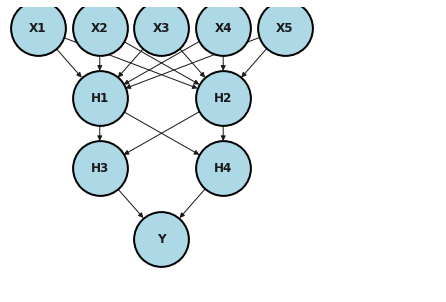

In [21]:
G.add_edges_from([ ("X1", "H1"), ("X2", "H1"), ("X3", "H1"),  ("X4", "H1"), ("X5", "H1")])
G.add_edges_from([ ("X1", "H2"), ("X2", "H2"), ("X3", "H2"),  ("X4", "H2"), ("X5", "H2")])
G.add_edges_from([ ("H1", "H3"), ("H2", "H3")])
G.add_edges_from([ ("H1", "H4"), ("H2", "H4")])

G.add_edges_from([ ("H3",  "Y"), ("H4",  "Y")])
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 3000,
        node_color = "lightblue",
        linewidths = 2)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-.5, 6.5])
ax.set_ylim([-.8, 3.3])
plt.show()

In [22]:
## Define the model
## Dimension of the hidden layer
H1 = 2
H2=2
## Number of predictors
D_in = xtraining.size()[1]
D_out = 1

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, H2),
    torch.nn.ReLU(),
    torch.nn.Linear(H2, D_out),
)

In [23]:
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(100000):
    y_pred = model(xtraining)
    loss = loss_fn(y_pred, ytraining)
    if t % 10000 == 0:
        print(t, loss.item())
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 72604303360.0
10000 39088312320.0
20000 39088312320.0
30000 39088312320.0
40000 39088312320.0
50000 39088312320.0
60000 39088312320.0
70000 39088312320.0
80000 39088312320.0
90000 39088312320.0


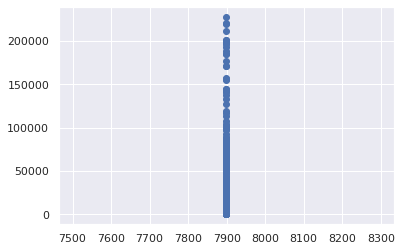

In [24]:
## try prediction
ytesting_pred = model(xtesting)
a = ytesting_pred.detach().numpy()

plt.scatter(a[:,0], ytesting[:,0])